In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [ ]:
train_file = "./train.tsv"
test_file = "./test.tsv"

train_data = pandas.read_csv(train_file, delimiter='\t').to_numpy()
train_data2 = np.empty((train_data.shape[0], train_data.shape[1]-2))
train_data2[:, 0:] = train_data[:, 2:]
train_data2[:,3:4] = train_data2[:, 3:4] / 12.0 #月を0～1に正規化
train_data2[:,5:6] = train_data2[:,5:6] / 6.0   #曜日を0～1に正規化
train_data2[:,7:8] = train_data2[:,7:8] / 4.0   #天気を0～1に正規化
train_data2 = train_data2.astype(np.float32)

test_data = pandas.read_csv(test_file, delimiter='\t').to_numpy()
test_data2 = np.empty((test_data.shape[0], test_data.shape[1]-2))
test_data2[:, 0:] = test_data[:, 2:]
test_data2[:,3:4] = test_data2[:, 3:4] / 12.0 #月を0～1に正規化
test_data2[:,5:6] = test_data2[:,5:6] / 6.0   #曜日を0～1に正規化
test_data2[:,7:8] = test_data2[:,7:8] / 4.0   #天気を0～1に正規化
test_data2 = test_data2.astype(np.float32)

display(train_data2)
display(test_data2)

x = train_data2[:, 12:]
x = x.reshape(x.shape[0], 1)
print(x)
y = train_data2[:, :12]
y = y.reshape(y.shape[0], y.shape[1],1)
print(y)
test_y = test_data2.reshape(test_data2.shape[0], test_data2.shape[1], 1)

In [68]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 400  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
y.shape

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=100, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

In [84]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 1s 4ms/step - loss: 1501.2057 - accuracy: 0.0124


[1501.2056884765625, 0.012377096340060234]

In [ ]:
predicted

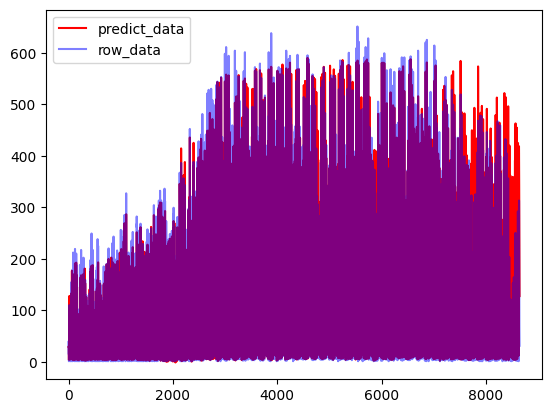

In [86]:
plt.figure()
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.show()